<a href="https://colab.research.google.com/github/chloe-mt-cheng/imf_css/blob/main/mock_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/gdrive/My Drive')

Not sure if you can access the scripts and data, here are some links if you need to download them or save them to your own drive:

*   telluric correction script: https://drive.google.com/file/d/1WuOtCtU0w8aD30o9Dzuk7H_OXlbUnIeu/view?usp=sharing
*   smoothing script: https://drive.google.com/file/d/1eX9YrGJDuNK7ejZFgqO2uCofU2WxFDc5/view?usp=sharing
*   read_alf: https://drive.google.com/file/d/1hyl-QRur31Na4wHxNsQnqG0k-4nEurPL/view?usp=sharing
*   S/N = 100 results: https://drive.google.com/drive/folders/1zV6MpJDTeEi7PXlgKcnDICue7_NyvoOw?usp=sharing
*   S/N = 1000 results: https://drive.google.com/drive/folders/12VTpoGhNDOpLWG4IiOBZci97qxjxIshW?usp=sharing


In [3]:
!pip install astro-sedpy
!pip install astro-prospector

In [4]:
import numpy as np
import astropy.io.ascii 
import astropy.io.fits as fits
import telluric_correction as tell
import smoothing as smooth
from read_alf import Alf
import glob
import matplotlib.pyplot as plt

font = {'family':'serif',
        'weight':'normal',
        'size':20
}
plt.rc('font',**font)

%matplotlib inline

In [7]:
#Get the S/N = 100 fit results
mock_sn100_paths = []
path_ends = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
for i in range(len(path_ends)):
    mock_sn100_paths.append('/content/gdrive/My Drive/mock_z-1.5_mc0.5_sn100/mock_z-1.5_mc0.5_test' \
                           + path_ends[i])

#Use read_alf.py to read the fit results
mock_sn100 = []
for i in range(len(mock_sn100_paths)):
    mock_sn100.append(Alf(mock_sn100_paths[i], read_mcmc=True))

In [9]:
#Get the S/N = 1000 fit results
mock_sn1000_paths = []
path_ends = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
for i in range(len(path_ends)):
    mock_sn1000_paths.append('/content/gdrive/My Drive/mock_z-1.5_mc0.5_sn1000/mock_z-1.5_mc0.5_sn1000_'\
                             + path_ends[i])

#Use read_alf.py to read the fit results
mock_sn1000 = []
for i in range(len(mock_sn1000_paths)):
    mock_sn1000.append(Alf(mock_sn1000_paths[i], read_mcmc=True))
    

In [10]:
#Input values
input_ML = 1.00205356839102
input_mc = 0.5
input_alpha1 = 1.3
input_alpha2 = 2.3

#Get posteriors
#S/N = 100
mock_sn100_mc_posteriors = []
mock_sn100_alpha1_posteriors = []
mock_sn100_alpha2_posteriors = []
mock_sn100_ML_posteriors = []
for i in range(len(mock_sn100)):
    mock_sn100_mc_posteriors.append(mock_sn100[i].mcmc[:,43])
    mock_sn100_alpha1_posteriors.append(mock_sn100[i].mcmc[:,25])
    mock_sn100_alpha2_posteriors.append(mock_sn100[i].mcmc[:,26])
    mock_sn100_ML_posteriors.append(mock_sn100[i].mcmc[:,47])
    
#S/N = 1000
mock_sn1000_mc_posteriors = []
mock_sn1000_alpha1_posteriors = []
mock_sn1000_alpha2_posteriors = []
mock_sn1000_ML_posteriors = []
for i in range(len(mock_sn1000)):
    mock_sn1000_mc_posteriors.append(mock_sn1000[i].mcmc[:,43])
    mock_sn1000_alpha1_posteriors.append(mock_sn1000[i].mcmc[:,25])
    mock_sn1000_alpha2_posteriors.append(mock_sn1000[i].mcmc[:,26])
    mock_sn1000_ML_posteriors.append(mock_sn1000[i].mcmc[:,47])

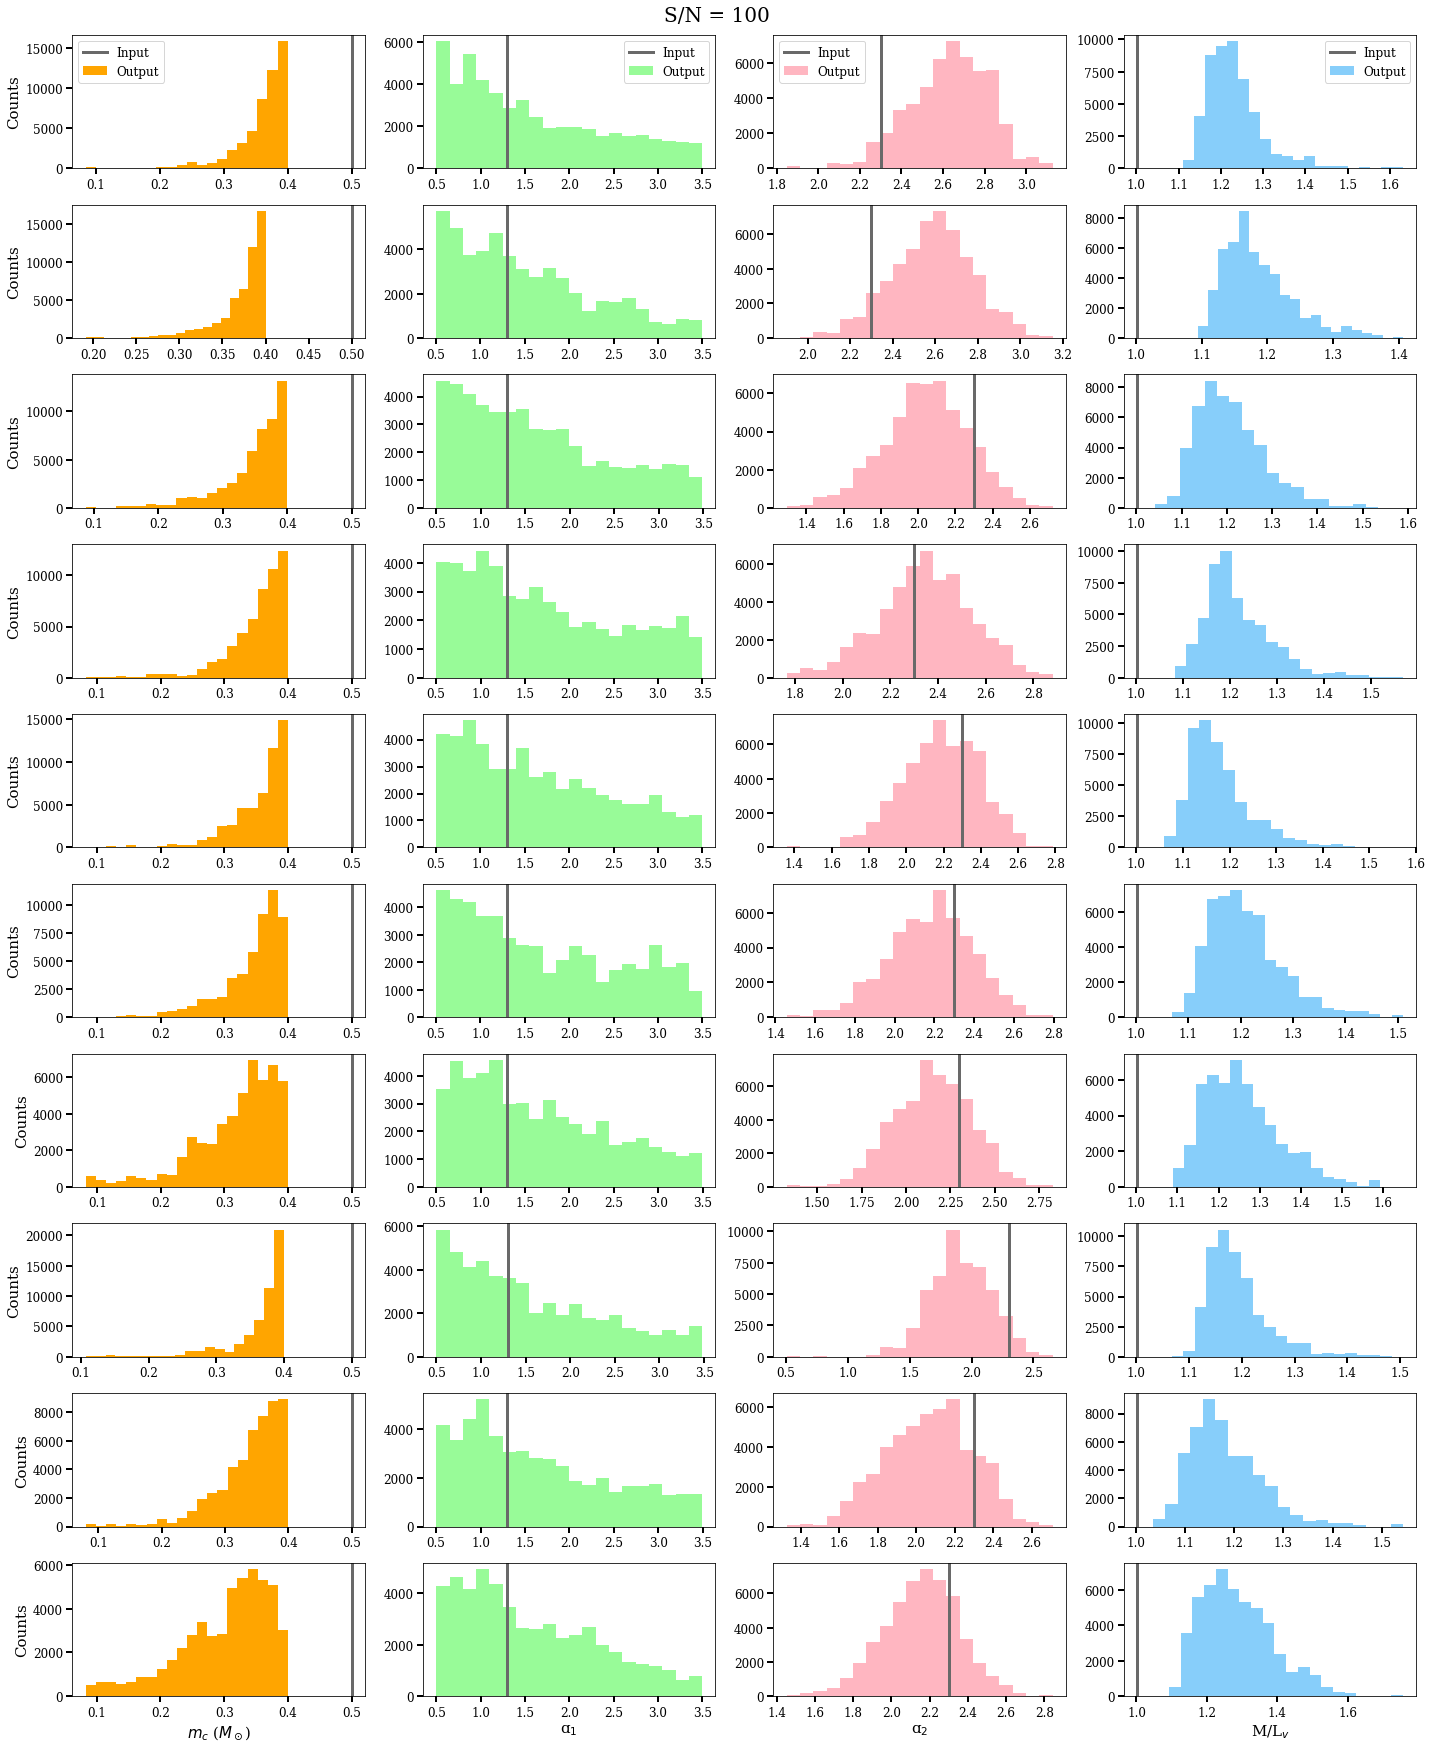

In [11]:
#Plot each individual posterior and input value, for all 10 spectra (S/N = 100)
fig, ax = plt.subplots(nrows=10, ncols=4, figsize=(20, 24))
fig.set_tight_layout(True)
fig.suptitle('S/N = 100', fontsize=20, y=1.01)

for i in range(len(mock_sn100)):
    ax[i,0].hist(mock_sn100_mc_posteriors[i], color='orange', bins=20, label='Output')
    ax[i,0].axvline(input_mc, color='dimgray', label='Input', lw=3)
    ax[i,0].tick_params(length=6, width=2, labelsize=12)
    ax[i,0].set_ylabel('Counts', fontsize=15)
    
    ax[i,1].hist(mock_sn100_alpha1_posteriors[i], color='palegreen', bins=20, label='Output')
    ax[i,1].axvline(input_alpha1, color='dimgray', label='Input', lw=3)
    ax[i,1].tick_params(length=6, width=2, labelsize=12)
    
    ax[i,2].hist(mock_sn100_alpha2_posteriors[i], color='lightpink', bins=20, label='Output')
    ax[i,2].axvline(input_alpha2, color='dimgray', label='Input', lw=3)
    ax[i,2].tick_params(length=6, width=2, labelsize=12)
    
    ax[i,3].hist(mock_sn100_ML_posteriors[i], color='lightskyblue', bins=20, label='Output')
    ax[i,3].axvline(input_ML, color='dimgray', label='Input', lw=3)
    ax[i,3].tick_params(length=6, width=2, labelsize=12)
    
ax[9,0].set_xlabel('$m_c$ ($M_\odot$)', fontsize=15)
ax[9,1].set_xlabel('ɑ$_1$', fontsize=15)
ax[9,2].set_xlabel('ɑ$_2$', fontsize=15)
ax[9,3].set_xlabel('M/L$_{v}$', fontsize=15)
ax[0,0].legend(fontsize=12)
ax[0,1].legend(fontsize=12)
ax[0,2].legend(fontsize=12)
ax[0,3].legend(fontsize=12)
#plt.savefig('sn100_all_posteriors.png', bbox_inches='tight')

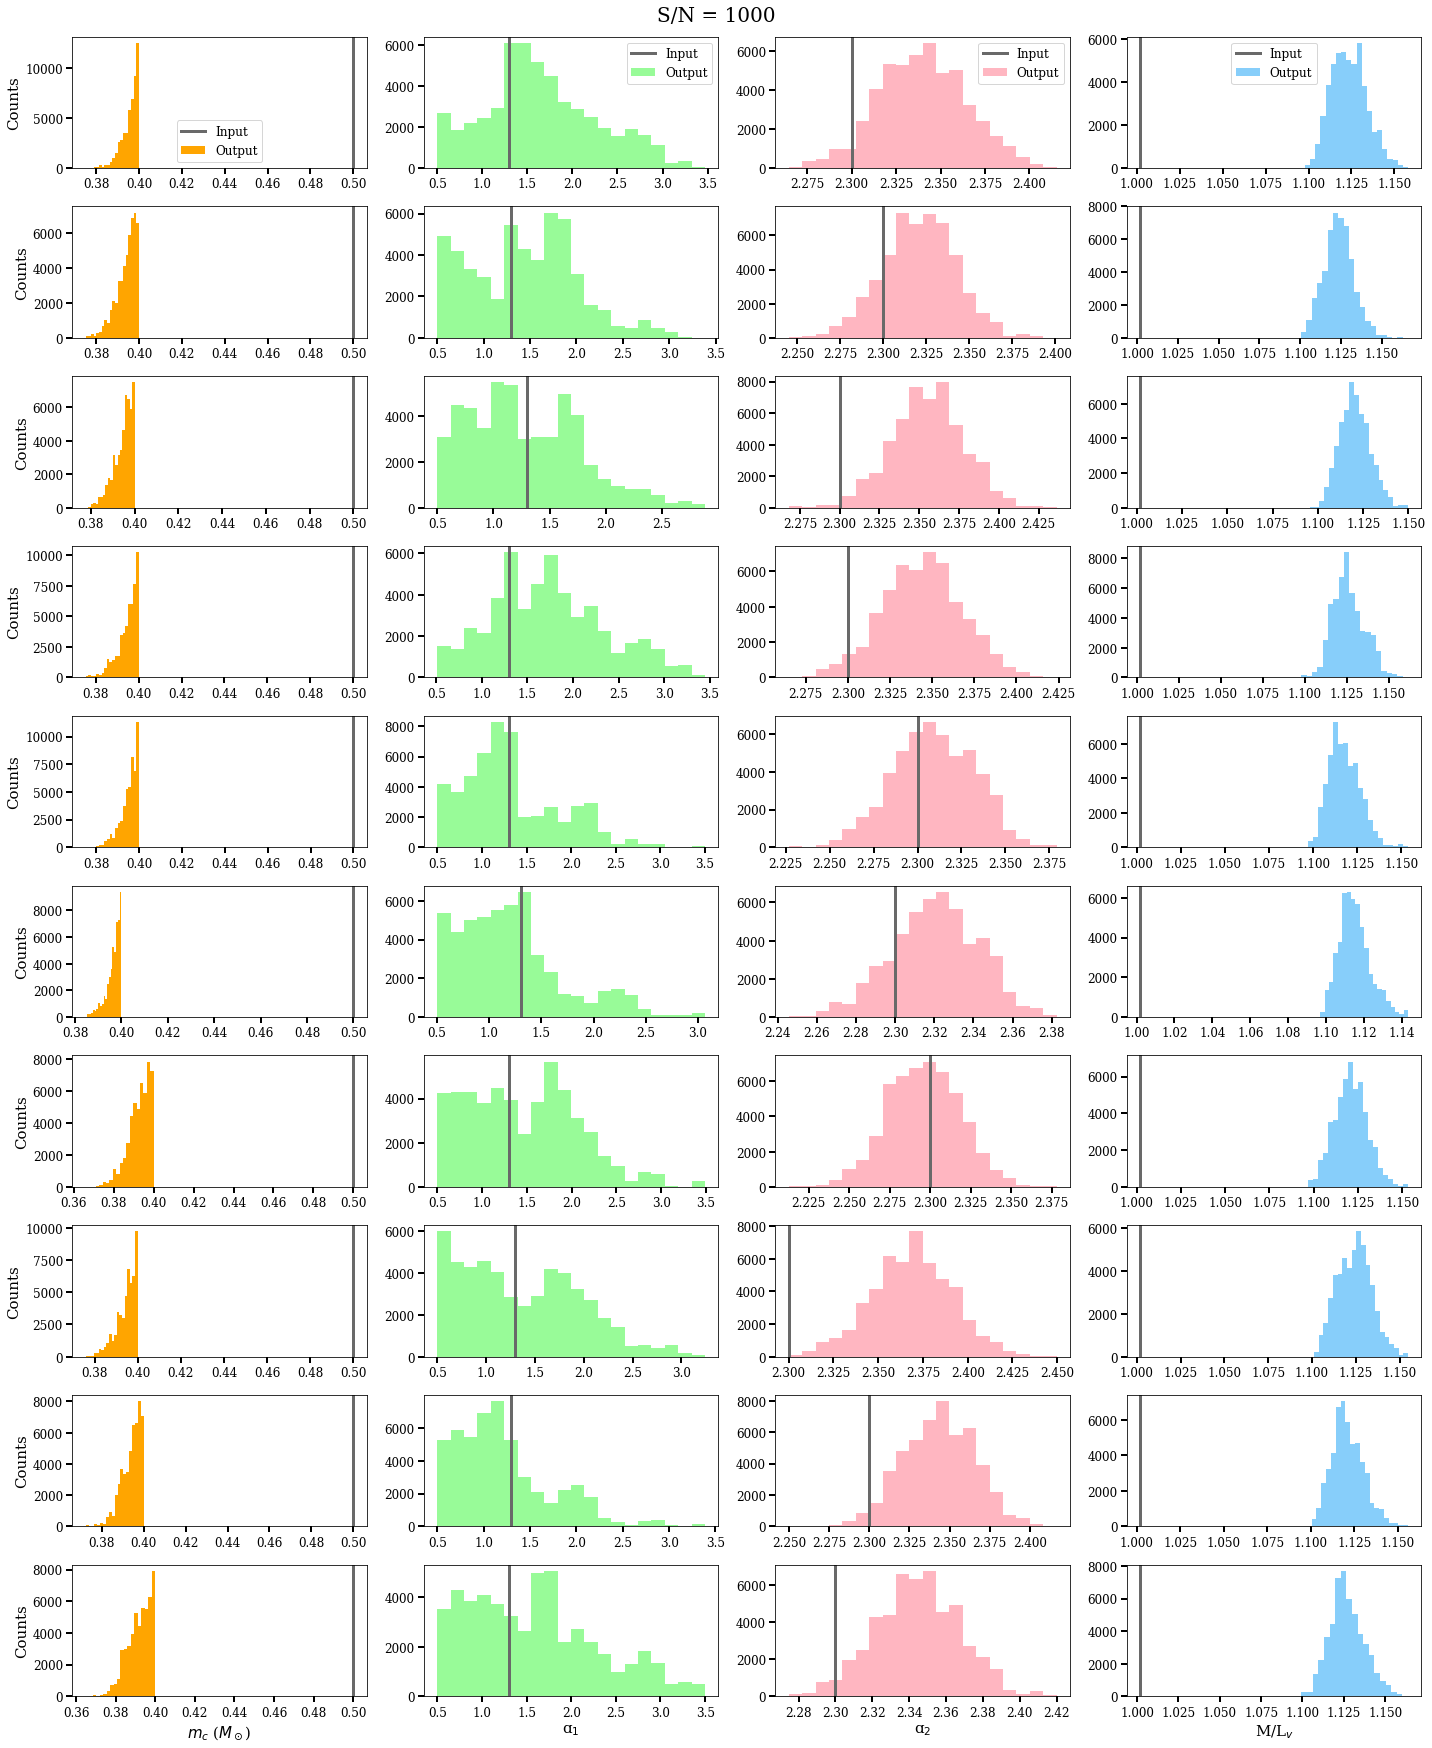

In [12]:
#Plot each individual posterior and input value, for all 10 spectra (S/N = 1000)
fig, ax = plt.subplots(nrows=10, ncols=4, figsize=(20, 24))
fig.set_tight_layout(True)
fig.suptitle('S/N = 1000', fontsize=20, y=1.01)

for i in range(len(mock_sn1000)):
    ax[i,0].hist(mock_sn1000_mc_posteriors[i], color='orange', bins=20, label='Output')
    ax[i,0].axvline(input_mc, color='dimgray', label='Input', lw=3)
    ax[i,0].tick_params(length=6, width=2, labelsize=12)
    ax[i,0].set_ylabel('Counts', fontsize=15)
    
    ax[i,1].hist(mock_sn1000_alpha1_posteriors[i], color='palegreen', bins=20, label='Output')
    ax[i,1].axvline(input_alpha1, color='dimgray', label='Input', lw=3)
    ax[i,1].tick_params(length=6, width=2, labelsize=12)
    
    ax[i,2].hist(mock_sn1000_alpha2_posteriors[i], color='lightpink', bins=20, label='Output')
    ax[i,2].axvline(input_alpha2, color='dimgray', label='Input', lw=3)
    ax[i,2].tick_params(length=6, width=2, labelsize=12)
    
    ax[i,3].hist(mock_sn1000_ML_posteriors[i], color='lightskyblue', bins=20, label='Output')
    ax[i,3].axvline(input_ML, color='dimgray', label='Input', lw=3)
    ax[i,3].tick_params(length=6, width=2, labelsize=12)
    
ax[9,0].set_xlabel('$m_c$ ($M_\odot$)', fontsize=15)
ax[9,1].set_xlabel('ɑ$_1$', fontsize=15)
ax[9,2].set_xlabel('ɑ$_2$', fontsize=15)
ax[9,3].set_xlabel('M/L$_{v}$', fontsize=15)
ax[0,0].legend(fontsize=12)
ax[0,1].legend(fontsize=12)
ax[0,2].legend(fontsize=12)
ax[0,3].legend(fontsize=12)
#plt.savefig('sn1000_all_posteriors.png', bbox_inches='tight')

It seems like imf1 and imf2 are being recovered okay in general, but mc and M/L are not really being recovered at all, and I'm not sure why

In [15]:
#Now I want to look at the combined posteriors instead of the individual ones
#Let's use S/N = 100 dataset as example for now
#Stack posteriors - turn posterior lists into arrays for convenience
mc_stack_sn100 = np.array((mock_sn100_mc_posteriors))
alpha1_stack_sn100 = np.array((mock_sn100_alpha1_posteriors))
alpha2_stack_sn100 = np.array((mock_sn100_alpha2_posteriors))
ML_stack_sn100 = np.array((mock_sn100_ML_posteriors))

print('Shape of stacked posteriors: ', mc_stack_sn100.shape)

#Get percentiles
#mc
mc_sn100_best_fit = np.percentile(mc_stack_sn100, 50, axis=1)
mc_sn100_lo_err = np.percentile(mc_stack_sn100, 16, axis=1)
mc_sn100_hi_err = np.percentile(mc_stack_sn100, 84, axis=1)
print('Shape of best-fit using 50th percentile across axis=1: ', mc_sn100_best_fit.shape) #These should just be one number... how can I summarize or combine these?
print('Shape of lower error using 16th percentile across axis=1: ',mc_sn100_lo_err.shape)
print('Shape of upper error using 84th percentile across axis=1: ',mc_sn100_hi_err.shape)

#alpha1
alpha1_sn100_best_fit = np.percentile(alpha1_stack_sn100, 50, axis=1)
alpha1_sn100_lo_err = np.percentile(alpha1_stack_sn100, 16, axis=1)
alpha1_sn100_hi_err = np.percentile(alpha1_stack_sn100, 84, axis=1)

#alpha2
alpha2_sn100_best_fit = np.percentile(alpha2_stack_sn100, 50, axis=1)
alpha2_sn100_lo_err = np.percentile(alpha2_stack_sn100, 16, axis=1)
alpha2_sn100_hi_err = np.percentile(alpha2_stack_sn100, 84, axis=1)

#M/L
ML_sn100_best_fit = np.percentile(ML_stack_sn100, 50, axis=1)
ML_sn100_lo_err = np.percentile(ML_stack_sn100, 16, axis=1)
ML_sn100_hi_err = np.percentile(ML_stack_sn100, 84, axis=1)

#Get Deltas?
delta_sn100_mc = input_mc - mc_sn100_best_fit
delta_sn100_alpha1 = input_alpha1 - alpha1_sn100_best_fit
delta_sn100_alpha2 = input_alpha2 - alpha2_sn100_best_fit
delta_sn100_ML = input_ML - ML_sn100_best_fit
print('Shape of input - output: ', delta_sn100_mc.shape) #This should just be 1 number

Shape of stacked posteriors:  (10, 51200)
Shape of best-fit using 50th percentile across axis=1:  (10,)
Shape of lower error using 16th percentile across axis=1:  (10,)
Shape of upper error using 84th percentile across axis=1:  (10,)
Shape of input - output:  (10,)
